## softmax 多分类
categorical_crossentropy  and  sparse_categorical_crossentropy 

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 使用keras.datasets加载一些常用数据集
c盘 用户 。keras 文件夹下的。datasets

In [2]:
#Fashion-MNIST 时尚物品数据集
(train_image,train_label),(test_image,test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_image.shape  #6000张 28*28图片

(60000, 28, 28)

In [4]:
train_label.shape

(60000,)

In [5]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

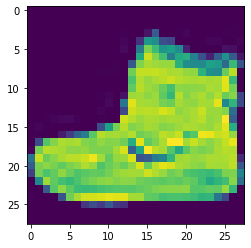

In [6]:
plt.imshow(train_image[0])  #rgb取值

In [7]:
np.max(train_image[0])

255

In [8]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 归一化处理

In [9]:
train_image=train_image/255
test_image=test_image/255

In [10]:
model=tf.keras.Sequential()

### 图片是二维数据 28*28  使用tf.keras.layers.Flatten

In [11]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #扁平成向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))  #10个输出 为 概率分布

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) 
#label 数字编码时 0 1 2 3 使用sparse_categorical_crossentropy

In [14]:
model.fit(train_image,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4962 - acc: 0.8261
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3735 - acc: 0.8650
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3354 - acc: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3107 - acc: 0.8855A: 
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2929 - acc: 0.8916A: 0s - loss: 0.2929 - acc: 0.89


In [15]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 904us/step - loss: 0.3626 - acc: 0.8671


[0.3626454472541809, 0.8671000003814697]

## 如何去优化

独热编码： 特征可能是分类值  ; loss : categorical_crossentropy

文本处理


将离散特征映射到欧氏空间，来计算特征之间的距离

In [16]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
train_label_onehot=tf.keras.utils.to_categorical(train_label)
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_label_onehot=tf.keras.utils.to_categorical(test_label)

In [19]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #扁平成向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))  #10个输出 为 概率分布

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) 

In [21]:
model.fit(train_image,train_label_onehot,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4945 - acc: 0.8253
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3712 - acc: 0.8646
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3336 - acc: 0.8782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3105 - acc: 0.8848
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2915 - acc: 0.8925


In [22]:
predict=model.predict(test_image)
predict.shape

(10000, 10)

In [23]:
predict[0]

array([7.6197216e-06, 4.1237533e-09, 5.4684369e-06, 1.7183741e-07,
       2.9637531e-06, 1.8758468e-02, 7.6452270e-06, 4.1428640e-02,
       1.9928825e-04, 9.3958980e-01], dtype=float32)

In [24]:
#根据predict 获得编码，其中最大值为分类结果
np.argmax(predict[0])

9

In [25]:
test_label[0]

9